In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

In [2]:
file = pd.read_csv(r"C:\Users\User\Desktop\Data Science\Projects Dataset\laptop_price.csv", encoding='latin')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
file.shape

(1303, 13)

In [5]:
file.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
file.duplicated().sum()

0

In [7]:
file.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data Cleaning

Since the dataset contains a unique index for each row, i will drop the "laptop_ID" column as this does not serve any purpose

In [8]:
file.drop(columns = "laptop_ID", inplace=True)

In [17]:
file.Product.unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

The Product column contains additional information asides the product name. To extract the product name i would split the column and only return the neccessary information. 

In [25]:
def product_remv_spec(x):
    try:
        return x.split('(')[0]
    except:
        pass

In [26]:
file['Product'] = file.Product.apply(lambda x : product_remv_spec(x))

In [27]:
file.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [28]:
file.Inches.unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [29]:
file.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

The Cpu column is made up of the processing speed and the type of Cpu. I would split this column into "Speed"(contains the processing speed) and "Cpu"(contains the type of Cpu). Then i would remove the original Cpu column

In [31]:
def Cpu_rmv_speed(x):
    return x.split(" ")[-1][:-3]

In [32]:
file["Speed"] = file.Cpu.apply(lambda x : Cpu_rmv_speed(x))

In [34]:
def Cpu_rmv_speed2(x):
    length = len(x.split(" ")[-1])
    return x[:-length]

In [35]:
file['Cpu'] =  file.Cpu.apply(lambda x : Cpu_rmv_speed2(x))

In [36]:
file["Speed"] = file.Speed.astype(float,)

In [18]:
file.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

To clean the Ram column, i would remove the "GB" attached to each value after which i would convert the column into integer

In [39]:
file.Ram = file.Ram.apply(lambda x : x.strip("GB")).astype(int)

In [40]:
file.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [41]:
file.Weight

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1298     1.8kg
1299     1.3kg
1300     1.5kg
1301    2.19kg
1302     2.2kg
Name: Weight, Length: 1303, dtype: object

To clean the Weight column, i would remove the "kg" attached to each value after which i would convert the column into float

In [42]:
file.Weight = file.Weight.apply(lambda x : x.strip("kg")).astype(float)

In [45]:
file.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

The Memory column is made up different memory types("SSD", "HDD","Hybrid",and "Flash Storage") and memory sizes. I would separate this column into four different columns.memory_type1, memory_type_2(for laptops with additional memory), memory1_size, memory2_size(for laptops with additional memory).Then i would change the memory in "TB" to "GB" to ensure uniformity.After this i would drop the original memory column.

In [46]:
def memory_type1(x): 
    length = len(x.split(" "))
    if length == 2:
        return x.split(" ")[-1]
    elif length == 3:
        return x[-13:]
    else: 
        return x.split(" ")[1]

In [47]:
def Memory_type_2(x):
    if len (x.split(" ")) > 3:
        return x.split(" ")[-1]
    else:
        return "None"

In [48]:
def Memory1_size(x):
    a =  x.split(" ")[0]
    if "GB" in a:
        return float(a.strip("GB"))
    else:
        b = float(a.strip("TB"))
        return (b * 1000)

In [49]:
def Memory2_size(x):
    if len(x.split(" ")) > 3:
        a = x.split(" ")[-2]
        if "GB" in a:
            return float(a.strip("GB"))
        else:
            b = float(a.strip("TB"))
            return (b * 1000)
    else:
        return(0)

In [50]:
file['Memory_Type_1'] = file.Memory.apply(lambda x : memory_type1(x))

In [51]:
file['Memory_Type_2'] = file.Memory.apply(lambda x : Memory_type_2(x))

In [52]:
file['Memory1_Size'] = file.Memory.apply(lambda x : Memory1_size(x))

In [53]:
file["Memory2_Size"] = file.Memory.apply(lambda x : Memory2_size(x))

In [59]:
file.drop(columns = "Memory", inplace=True)

In [60]:
file.ScreenResolution

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

The ScreenResoluton column contains the screen type, the screen resolution and wether or not the screen is touch screen. I would separate the column into three columns then drop the original column.

In [61]:
def screen_type(x):
    try:
        if "/" in x:
            a = x.split("/")
            if a[0] != "Touchscreen ":
                return a[0]
            else:
                b = a[1].split(" ")
                length = len(b[-1])
                return (a[1][:-(length+1)])
        else:
            a = x.split(" ")
            if a[0] != "Touchscreen":
                length = len(x.split(" ")[-1]) + 1
                return (x[:-length])
            else:
                pass 
    except:
        pass

In [62]:
def Resolution (x):
    try:
        return (x.split(" ")[-1])
    except:
        return(x)

In [63]:
def Touchscreen(x):
    if "Touchscreen" in x:
        return(1)
    else:
        return(0)

In [64]:
file["Screen_Type"] = file.ScreenResolution.apply(lambda x : screen_type(x))

In [65]:
file["Resolution"] = file.ScreenResolution.apply(lambda x : Resolution(x))

In [66]:
file["Touchscreen"] = file.ScreenResolution.apply(lambda x : Touchscreen(x))

In [67]:
file.drop(columns="ScreenResolution", inplace=True)

In [68]:
file.describe()

,Inches,Ram,Weight,Price_euros,Speed,Memory1_Size,Memory2_Size,Touchscreen
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992,2.298772,442.615503,168.288565,0.147352
std,1.426304,5.084665,0.665475,699.009043,0.506340,356.225802,402.618575,0.354593
min,10.100000,2.000000,0.690000,174.000000,0.900000,8.000000,0.000000,0.000000
25%,14.000000,4.000000,1.500000,599.000000,2.000000,256.000000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,977.000000,2.500000,256.000000,0.000000,0.000000
75%,15.600000,8.000000,2.300000,1487.880000,2.700000,512.000000,0.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3.600000,2000.000000,2000.000000,1.000000


# Data Analysis 

This a quick analysis on the dataset.From the graphs below, we can see that the laptops with least prices are majorly (Netbook and Notebook) and the most expensive laptops in the dataset are majorly (gaming,notebook and workstation).Thus,its obvious that the type of laptop is an important determinant of its price.Though the type of laptop can not solemly determine the price of a laptop.Most laptops with smaller prices have a speed of about "1.60 or less". This also plays an important role in determining the prices of Laptops.

## Laptop Type Vs Price

Text(0.5, 1.0, 'Most expensive Laptops(Type)')

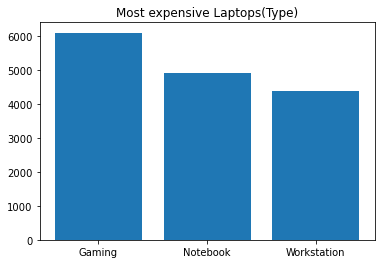

In [160]:
df1 = file[file["Price_euros"].isin(file.Price_euros.nlargest(5).tolist())]
plt.bar(height = df1.Price_euros, x = df1.TypeName)
plt.title("Most expensive Laptops(Type)")

Text(0.5, 1.0, 'Least expensive Laptops(Type)')

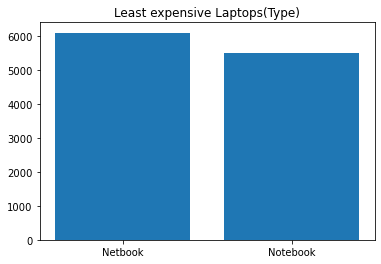

In [161]:
df2 = file[file["Price_euros"].isin(file.Price_euros.nsmallest(5).tolist())]
plt.bar(height = df1.Price_euros, x = df2.TypeName)
plt.title("Least expensive Laptops(Type)")

## Speed Vs Price

In [169]:
df3 = file[file["Price_euros"].isin(file.Price_euros.nsmallest(5).tolist())]
df4 = file[file["Price_euros"].isin(file.Price_euros.nlargest(5).tolist())]
pd.concat([df3, df4])[["Speed", "Price_euros"]]

,Speed,Price_euros
20,1.44,191.9
31,1.50,199.0
290,1.50,199.0
1120,1.44,196.0
1215,1.50,174.0
196,2.90,6099.0
610,3.10,4899.0
749,2.90,4389.0
830,2.90,5499.0
1066,2.70,3975.0


## Memory Type Vs Price

From the table and chart below we can see that most expensive laptops have "SSD" as their main memory with any other type of memory as an additional memory(or none). On the other hand, laptops with least prices majorly use "Flash memory" as their main memory with no additional memory.

In [194]:
df5 = file[file["Price_euros"].isin(file.Price_euros.nsmallest(20).tolist())]
df6 =  file[file["Price_euros"].isin(file.Price_euros.nlargest(10).tolist())]

In [196]:
df6[['Memory_Type_1','Memory_Type_2', 'Price_euros']]

,Memory_Type_1,Memory_Type_2,Price_euros
196,SSD,None,6099.0
238,SSD,HDD,3890.0
610,SSD,None,4899.0
723,SSD,HDD,3659.4
749,SSD,None,4389.0
780,SSD,HDD,3588.8
830,SSD,None,5499.0
1066,SSD,None,3975.0
1136,SSD,None,3949.4
1231,SSD,None,3499.0


Text(0.5, 1.0, 'Least expensive Laptops(Memory_Type)')

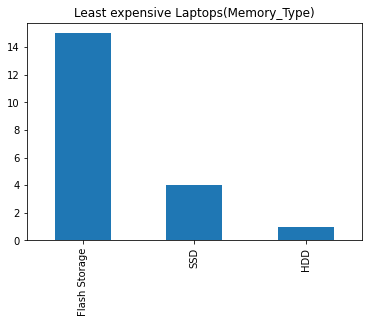

In [185]:
df5.Memory_Type_1.value_counts().plot(kind = 'bar')
plt.title("Least expensive Laptops(Memory_Type)")

## Memory Size Vs Price

As we can see from the tables, most expensive laptops have large memory storage ranging from (256 to 1000 gigabytes). On the other hand most least expensive laptops have significantlly low memory storage. 

In [200]:
df6[['Memory1_Size','Memory2_Size', 'Price_euros']]

,Memory1_Size,Memory2_Size,Price_euros
196,1000.0,0.0,6099.0
238,512.0,1000.0,3890.0
610,1000.0,0.0,4899.0
723,1000.0,1000.0,3659.4
749,256.0,0.0,4389.0
780,1000.0,1000.0,3588.8
830,512.0,0.0,5499.0
1066,1000.0,0.0,3975.0
1136,256.0,0.0,3949.4
1231,1000.0,0.0,3499.0


In [201]:
df5[['Memory1_Size','Memory2_Size', 'Price_euros']]

,Memory1_Size,Memory2_Size,Price_euros
20,32.0,0.0,191.90
30,64.0,0.0,244.99
31,32.0,0.0,199.00
67,32.0,0.0,229.00
290,16.0,0.0,199.00
483,64.0,0.0,248.90
515,32.0,0.0,245.00
555,500.0,0.0,224.00
626,32.0,0.0,239.00
791,32.0,0.0,202.90


# Further Data Cleaning

In [203]:
file.Memory1_Size.value_counts()

256.0     508
1000.0    250
128.0     177
512.0     140
500.0     132
32.0       45
64.0       17
2000.0     16
16.0       10
180.0       5
240.0       1
8.0         1
508.0       1
Name: Memory1_Size, dtype: int64

In [204]:
file.Memory2_Size.value_counts()

0.0       1095
1000.0     187
2000.0      15
256.0        3
500.0        2
512.0        1
Name: Memory2_Size, dtype: int64

I would drop some values in memory1_size and memory2_size columns.These values only occured one time in the dataset so they would not help the model much

In [205]:
file.drop(file[file.Memory1_Size.isin([240.0,8.0,508.0])].index, axis = 0, inplace = True)
file.drop(file[file.Memory2_Size.isin([512.0])].index, axis = 0, inplace= True)

In [207]:
file.Memory_Type_1.value_counts()

SSD              840
HDD              375
Flash Storage     74
Hybrid             9
Flash              1
Name: Memory_Type_1, dtype: int64

In [208]:
file.Memory_Type_2.value_counts()

None      1092
HDD        202
SSD          3
Hybrid       2
Name: Memory_Type_2, dtype: int64

In [211]:
file.drop(file[file.Memory_Type_1 == "Flash"].index, axis = 0, inplace=True)

The function below is just to eliminate any whitespace in the Screen_type column

In [215]:
def strip_x(x):
    try: 
        return (x.strip())
    except:
        pass

In [216]:
file["Screen_Type"] = file.Screen_Type.apply(lambda x : strip_x(x))

From the distplot below, we can see that the Price_euros column is right skewed. To elimimate this, i would log_transform the column

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

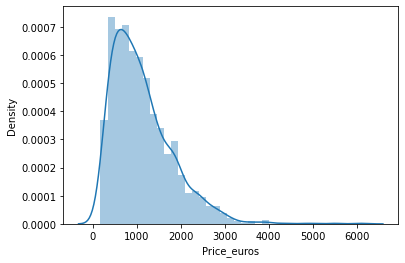

In [221]:
sns.distplot(file.Price_euros)

In [222]:
file["Price_euros"] = np.log(file.Price_euros)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

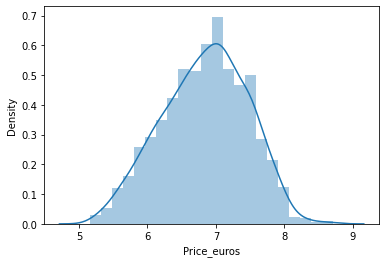

In [225]:
sns.distplot(file.Price_euros)

# Most frequent Cpu

In [226]:
def count_val(x):
    if "Intel" in x:
        return "Intel"
    elif "AMD" in x:
        return ("AMD")
    else:
        return (x.split (' ')[0])

In [227]:
file.Cpu.apply(lambda x : count_val(x)).value_counts()

Intel      1235
AMD          62
Samsung       1
Name: Cpu, dtype: int64

Since Samsun only appears once in the Cpu column, i would drop this value. It doesn't help the model much

In [228]:
file.drop(file[file.Cpu.str.contains("Samsung")].index, axis = 0, inplace=True)

In [229]:
file.Cpu.apply(lambda x : count_val(x)).value_counts()

Intel    1235
AMD        62
Name: Cpu, dtype: int64

# Modelling

In [230]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

In [231]:
df = file.copy()

In [232]:
cat = ["Company", "Product", "TypeName", "Cpu", "Gpu", "OpSys", "Memory_Type_1", "Memory_Type_2", "Screen_Type", "Resolution"]

In [233]:
for i in cat:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

<AxesSubplot:>

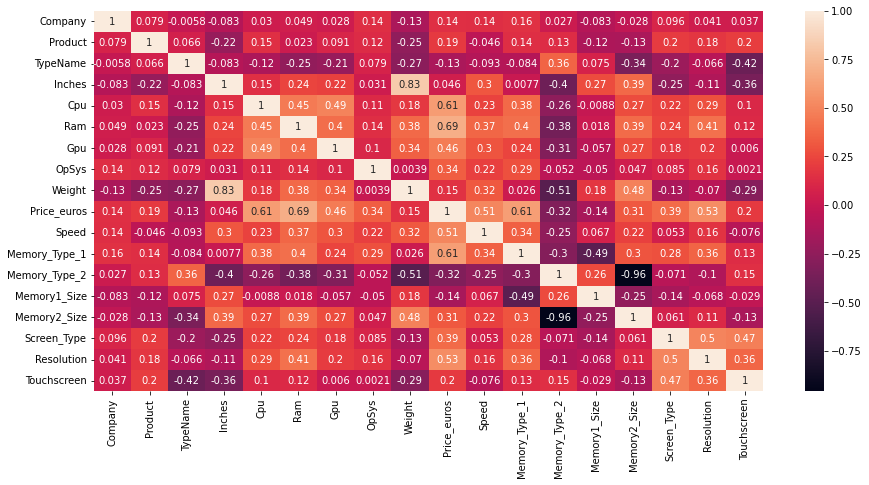

In [234]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot = True)

In [235]:
X = df.copy()
X.drop(columns = "Price_euros", inplace=True)
y = df["Price_euros"]

In [236]:
scaler = StandardScaler()

scaler.fit(X, y)
X_scaled = scaler.transform(X)

scaler.fit(y.values.reshape(-1, 1))
y_scaled = scaler.transform(y.values.reshape(-1, 1))

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled[:,0], test_size=0.2, random_state=42)

In [238]:
model = XGBRegressor(eta = 0.2)

In [239]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [240]:
model.score(X_test, y_test)

0.9401935242237892

In [241]:
y_pred = model.predict(X_test)

In [245]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
mae

0.1822455518500196

In [246]:
y_pred_act = pd.Series(np.exp(scaler.inverse_transform(y_pred.reshape(-1,1)))[:,0].tolist())
y_test_act = pd.Series(np.exp(scaler.inverse_transform(y_test.reshape(-1,1))[:,0]).tolist())

In [247]:
pd.concat([y_test_act, y_pred_act], axis = 1 ).rename(columns= {0 :"Y_test_val", 1:"Y_pred_val"}).head(50)

,Y_test_val,Y_pred_val
0,1219.00,1237.565674
1,1607.96,1526.660889
2,539.00,625.359863
3,1228.99,1348.054932
4,459.00,453.980988
5,499.00,577.844543
6,1262.00,1080.358643
7,1900.00,1986.164673
8,1699.00,1425.693970
9,519.00,598.211121
